# Visualize Your Own Data

Here's your chance to create a visualization for a data set that is meaningful to you. You are encouraged to use a data set that you might analyze as part of your final project. However, if you have no idea what you want to do for a final project and don't have time to think about it, you can also pick a data set from the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.html). Pick one with at least 10 variables. (In the left-hand column of the UCI repository, you can filter to data sets whose # Attributes is between 10 and 100.)

Once you have chosen a data set, upload it to JupyterHub in the same directory as this notebook. (Navigate to the directory on JupyterHub, and click the "Upload" button in the top-right corner.) Make sure that you use relative paths when you read in the data set. In other words, your notebook should still run if we copy your `Lab4/` folder to our own directory. 

Your task is to create a data-dense graphic that communicates **at least five variables** in the data set. You will probably want to use Altair.

# Facebook metrics on popular comsetics brand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from altair import *
%matplotlib inline

In [2]:
data = pd.read_csv('dataset_Facebook.csv')
data.head(n=3)

,Page total likes;Type;Category;Post Month;Post Weekday;Post Hour;Paid;Lifetime Post Total Reach;Lifetime Post Total Impressions;Lifetime Engaged Users;Lifetime Post Consumers;Lifetime Post Consumptions;Lifetime Post Impressions by people who have liked your Page;Lifetime Post reach by people who like your Page;Lifetime People who have liked your Page and engaged with your post;comment;like;share;Total Interactions
0,139441;Photo;2;12;4;3;0;2752;5091;178;109;159;...
1,139441;Status;2;12;3;10;0;10460;19057;1457;136...
2,139441;Photo;3;12;3;3;0;2413;4373;177;113;154;...


In [3]:
cols = np.array("".join(list(data)).split(';'))
dat = [data.loc[row][0].split(';') for row in range (0,500)]
data_clean = pd.DataFrame(data=dat, columns=cols)
data_clean.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393


In [4]:
## After plotting data, outlier was noticed, must be removed.
data_clean['Total Interactions'] = pd.to_numeric(data_clean['Total Interactions'], errors='coerce')

In [5]:
maxInt = data_clean['Total Interactions'].max()
data_clean = data_clean[(data_clean['Total Interactions']==maxInt)==False]

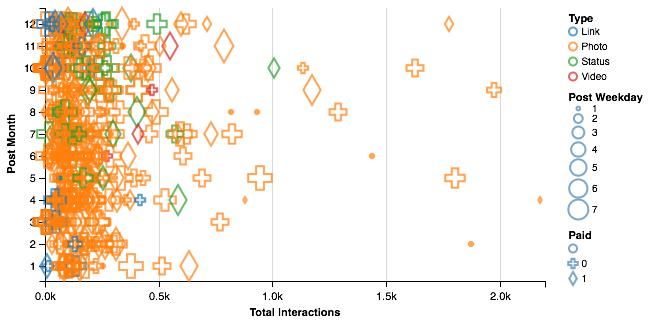

In [6]:
Chart(data_clean).mark_point().encode(
        y=Y('Post Month', sort=SortField(field='amount', order='descending', op='sum')),
        x=X('Total Interactions:Q'),
        color='Type',
        size='Post Weekday',
        shape='Paid')

Conclusion:

In my chart, I plotted the month of hte posting against the total interactions with the post by other users. I used colors to block for the type of posting, size of the points to account for the weekday of the post, and shapes to show whether or not the posting was paid for.

From the result of the chart, I was able to come to a few conclusions. First, the shape of the chart signals that posts later in the year (May-November specifically) received more interaction than others. Second, it was blatently obvious that photographic posts received the most attention and were the largest in frequency. Weekday did little to uncover any patterns, but there does seem to be a slight preferance for posts earlier in the week. This could be because people are out and about more on the weekends and sit at home more on their computers early in the week. Lastly, most posts in the area of 500+ interactions were unpaid for. 

My final conclusion, based on the results of 2014, is that the cosmetic company should expect the most attention on photographic posts between May and November in the first half the week. Also, paying for the posts is most likely not worth the money, since paid posts show even less attention than unpaid ones for posts with high levels of interaction.

### Grader's Comments

- 
- 

[This question is worth 20 points.]

In [7]:
scores = [0]